In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data = pd.read_csv("mpg.csv")

<br>
Let's import our datafile mpg.csv, which contains fuel economy data for 234 cars.

* class : car classification
* cty : city mpg
* cyl : # of cylinders
* displ : engine displacement in liters
* drv : f = front-wheel drive, r = rear wheel drive, 4 = 4wd
* fl : fuel (e = ethanol E85, d = diesel, r = regular, p = premium, c = CNG)
* hwy : highway mpg
* manufacturer : automobile manufacturer
* model : model of car
* trans : type of transmission
* year : model year

In [14]:
## top 5 rows of the dataframe

data.head()


,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [15]:
## find a general information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    234 non-null    int64  
 1   manufacturer  234 non-null    object 
 2   model         234 non-null    object 
 3   displ         234 non-null    float64
 4   year          234 non-null    int64  
 5   cyl           234 non-null    int64  
 6   trans         234 non-null    object 
 7   drv           234 non-null    object 
 8   cty           234 non-null    int64  
 9   hwy           234 non-null    int64  
 10  fl            234 non-null    object 
 11  class         234 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 22.1+ KB


In [16]:
data.manufacturer.unique()

array(['audi', 'chevrolet', 'dodge', 'ford', 'honda', 'hyundai', 'jeep',
       'land rover', 'lincoln', 'mercury', 'nissan', 'pontiac', 'subaru',
       'toyota', 'volkswagen'], dtype=object)

In [18]:
# converting a continuous column to a object type

data["cyl"] = data["cyl"].astype(str)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    234 non-null    int64  
 1   manufacturer  234 non-null    object 
 2   model         234 non-null    object 
 3   displ         234 non-null    float64
 4   year          234 non-null    int64  
 5   cyl           234 non-null    object 
 6   trans         234 non-null    object 
 7   drv           234 non-null    object 
 8   cty           234 non-null    int64  
 9   hwy           234 non-null    int64  
 10  fl            234 non-null    object 
 11  class         234 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 22.1+ KB


### One Hot Encoding

In [23]:
temp = data[["hwy","manufacturer","cyl"]]

In [24]:
new_encoded_data = pd.get_dummies(temp) ## this function converts all categorical variables in the dataframe to one hot encoded variables
new_encoded_data.head()

,hwy,manufacturer_audi,manufacturer_chevrolet,manufacturer_dodge,manufacturer_ford,manufacturer_honda,manufacturer_hyundai,manufacturer_jeep,manufacturer_land rover,manufacturer_lincoln,manufacturer_mercury,manufacturer_nissan,manufacturer_pontiac,manufacturer_subaru,manufacturer_toyota,manufacturer_volkswagen,cyl_4,cyl_5,cyl_6,cyl_8
0,29,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,29,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,31,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,30,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,26,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


It allows the use of categorical variables in models that require numerical input.
It can improve model performance by providing more information to the model about the categorical variable.
It can help to avoid the problem of ordinality, which can occur when a categorical variable has a natural ordering (e.g. “small”, “medium”, “large”).
The disadvantages of using one hot encoding include:
It can lead to increased dimensionality, as a separate column is created for each category in the variable. This can make the model more complex and slow to train.
 
It can lead to sparse data, as most observations will have a value of 0 in most of the one-hot encoded columns.
 
It can lead to overfitting, especially if there are many categories in the variable and the sample size is relatively small.
 
 One-hot-encoding is a powerful technique to treat categorical data, but it can lead to increased dimensionality, sparsity, and overfitting. It is important to use it cautiously and consider other methods such as ordinal encoding or binary encoding.

## Central Point and Spread of each variable

In [38]:
data = pd.read_csv("mpg.csv")

In [39]:
data.shape

(234, 12)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    234 non-null    int64  
 1   manufacturer  234 non-null    object 
 2   model         234 non-null    object 
 3   displ         234 non-null    float64
 4   year          234 non-null    int64  
 5   cyl           234 non-null    int64  
 6   trans         234 non-null    object 
 7   drv           234 non-null    object 
 8   cty           234 non-null    int64  
 9   hwy           234 non-null    int64  
 10  fl            234 non-null    object 
 11  class         234 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 22.1+ KB


In [41]:
data= data.drop(data.columns[0], axis=1)
# axis = 1 -> column
# axis = 0 -> row

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [43]:
## descriptive statistics of all variables ?

data.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [44]:
data.columns

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'cty',
       'hwy', 'fl', 'class'],
      dtype='object')

In [45]:
for i in data.columns:
    
    if(data[i].dtype.name == "object"):
        print("Category Column name is : "+i)
        
        print("Frequency Table is \n"+str(data[i].value_counts()))
        
    print("-------------------------------")

Category Column name is : manufacturer
Frequency Table is 
dodge         37
toyota        34
volkswagen    27
ford          25
chevrolet     19
audi          18
hyundai       14
subaru        14
nissan        13
honda          9
jeep           8
pontiac        5
land rover     4
mercury        4
lincoln        3
Name: manufacturer, dtype: int64
-------------------------------
Category Column name is : model
Frequency Table is 
caravan 2wd               11
ram 1500 pickup 4wd       10
civic                      9
jetta                      9
dakota pickup 4wd          9
mustang                    9
impreza awd                8
a4 quattro                 8
grand cherokee 4wd         8
a4                         7
toyota tacoma 4wd          7
camry solara               7
camry                      7
tiburon                    7
sonata                     7
passat                     7
f150 pickup 4wd            7
durango 4wd                7
explorer 4wd               6
new beetle        

### Boxplot

In [46]:
data.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


<AxesSubplot:>

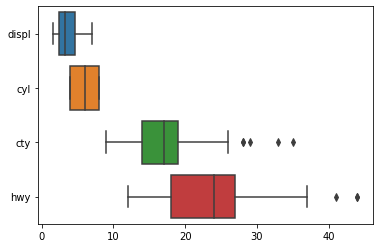

In [47]:
temp = data[["displ","cyl","cty","hwy"]]

sns.boxplot(data = temp, orient = 'h')

In [50]:
OutlierData = pd.DataFrame()
for col in ["cty","hwy"]:
    
    Q1 = temp[col].quantile(0.25) #Gives 25th Percentile or Q1
    Q3 = temp[col].quantile(0.75) #Gives 75th Percentile or Q3
    
    IQR = Q3 - Q1
    
    UpperBound = Q3 + 1.5*IQR
    LowerBound = Q1 - 1.5*IQR
    
    OutlierData[col] = temp[col][(temp[col]<LowerBound) | (temp[col]>UpperBound)]
    

In [53]:
OutlierData
OutlierData.index

Int64Index([99, 196, 212, 221, 222], dtype='int64')

#### HW: WRITE THE CODE TO REPLACE OUTLIERS WITH MEDIAN

### Remove the outliers

In [54]:
data_OutlierFree = data.drop(OutlierData.index,axis=0)
data_OutlierFree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  229 non-null    object 
 1   model         229 non-null    object 
 2   displ         229 non-null    float64
 3   year          229 non-null    int64  
 4   cyl           229 non-null    int64  
 5   trans         229 non-null    object 
 6   drv           229 non-null    object 
 7   cty           229 non-null    int64  
 8   hwy           229 non-null    int64  
 9   fl            229 non-null    object 
 10  class         229 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.5+ KB


### Outlier Detection using z score

In [56]:
OutlierData = pd.DataFrame()
for col in ["cty","hwy"]:
    
    z_score = (temp[col]-temp[col].mean())/temp[col].std()
    
    OutlierData[col] = temp[col][(z_score>3)|(z_score<-3)]
    
OutlierData   

,cty,hwy
212,33,44
221,35,44


### Scatterplot

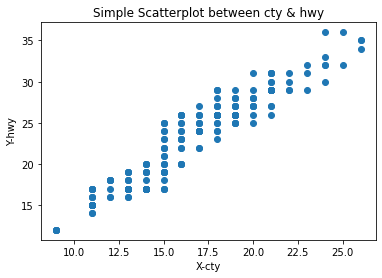

In [58]:
plt.scatter(data_OutlierFree["cty"],data_OutlierFree["hwy"])
plt.title('Simple Scatterplot between cty & hwy')
plt.xlabel('X-cty')
plt.ylabel('Y-hwy')

plt.show()